# Transaction Data Analysis

In [42]:
# Transaction Data & RFM Segmentation
# Created by : Rizal Aji Santoso
# Data Source : https://www.kaggle.com/datasets/vipin20/transaction-data/data

# Gathering Data

In [43]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# Importing dataset from local directory
df = pd.read_csv("C:\\Users\\ThinkPad\\Documents\\1. P (Project)\\data_project\\Transaction\\Sources\\transaction_data.csv")
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


# Data Preparations


In [44]:
# Show the dimension of the dataset
df.shape

(1083818, 8)

In [45]:
# Show brief information of variable name, count of value in each column, and column datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


In [46]:
# Converting UserId, TransactionId, ItemCode variables type to categorial
df[['UserId','TransactionId','ItemCode']] = df[['UserId','TransactionId','ItemCode']].astype('str')
# Converting TransactionTime Variables type to Datetime
df['TransactionTime'] = pd.to_datetime(df['TransactionTime'])
df.head()

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_9976\2585404216.py:4: FutureWarning: Parsed string "Sat Feb 02 12:50:00 IST 2019" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['TransactionTime'] = pd.to_datetime(df['TransactionTime'])


,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,2018-09-10 11:58:00,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   UserId                  1083818 non-null  object        
 1   TransactionId           1083818 non-null  object        
 2   TransactionTime         1083818 non-null  datetime64[ns]
 3   ItemCode                1083818 non-null  object        
 4   ItemDescription         1080910 non-null  object        
 5   NumberOfItemsPurchased  1083818 non-null  int64         
 6   CostPerItem             1083818 non-null  float64       
 7   Country                 1083818 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 66.2+ MB


In [48]:
# Show brief desriptive statistical information in each numerical column
df.describe(exclude=['datetime','object']).T

,count,mean,std,min,25%,50%,75%,max
NumberOfItemsPurchased,1083818.0,28.656749,654.243172,-242985.00,3.00,9.00,30.0,242985.00
CostPerItem,1083818.0,9.498798,2308.138578,-15265.64,1.73,2.88,5.7,1696285.44


In [49]:
# Show descriptive summary (count,unique value,top,frequency) in non-numeric (including = datetime)
df.describe(exclude=['number','datetime']).T

,count,unique,top,freq
UserId,1083818,4373,-1,270160
TransactionId,1083818,25900,6309435,2228
ItemCode,1083818,3407,1787079,7942
ItemDescription,1080910,4223,WHITE HANGING HEART T-LIGHT HOLDER,4738
Country,1083818,38,United Kingdom,990956


In [50]:
# Showing null values in each variables and ordered it by the highest null values.
df.isna().sum().sort_values(ascending=False)

ItemDescription           2908
UserId                       0
TransactionId                0
TransactionTime              0
ItemCode                     0
NumberOfItemsPurchased       0
CostPerItem                  0
Country                      0
dtype: int64

In [51]:
# Showing the number of the duplicated values in specific variables : TransactionId','ItemCode','ItemDescription
df.duplicated(subset=['TransactionTime','TransactionId','ItemCode','ItemDescription']).sum()

552676

In [52]:
df.sample(50)

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
265078,374661,6017209,2018-05-30 10:54:00,461475,PACK OF 60 DINOSAUR CAKE CASES,12,0.76,United Kingdom
1031975,270228,5950791,2018-03-26 11:25:00,1787583,WHITE HANGING HEART T-LIGHT HOLDER,18,4.08,United Kingdom
205071,374073,6268867,2018-12-18 12:01:00,1775256,ENGLISH ROSE NOTEBOOK A7 SIZE,3,0.58,United Kingdom
755689,274890,6128573,2018-08-29 06:12:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,36,10.56,United Kingdom
540608,296016,6387997,2019-02-16 13:17:00,460635,SUKI SHOULDER BAG,6,2.25,United Kingdom
618750,261177,6247010,2018-12-04 12:58:00,461748,PACK OF 6 SKULL PAPER PLATES,36,1.18,France
414612,305109,6203142,2018-11-02 10:10:00,1784853,75 GREEN PETIT FOUR CASES,3,0.58,United Kingdom
714107,-1,6388030,2019-02-16 13:28:00,1784370,SINGLE HEART ZINC T-LIGHT HOLDER,6,2.88,United Kingdom
1057319,-1,6225087,2018-11-19 12:15:00,478632,FLUTED ANTIQUE CANDLE HOLDER,48,2.25,United Kingdom
554419,340011,6288260,2018-12-30 08:49:00,477372,3D VINTAGE CHRISTMAS STICKERS,60,1.73,United Kingdom


# Data cleaning

In [53]:
# Create a new dataset and name it df_clean, which is the cleaned version of the original dataset.
df_clean = df.copy()

In [54]:
# Remove any duplicated value
df_clean = df_clean.drop_duplicates(subset=['TransactionTime','TransactionId','ItemCode','ItemDescription'])
# Removing values below one in the column 'NumberOfItemsPurchased
df_clean = df_clean[df_clean['NumberOfItemsPurchased'] >= 1]
# Capitalizing all letters in the column 'itemdescription'.
df_clean['ItemDescription'] = df_clean['ItemDescription'].str.upper()
# Impute null values in the 'itemdescription' column with values from another 'itemdescription' column using 'itemcode' as reference
df_clean['ItemDescription'] = df_clean.groupby('ItemCode')['ItemDescription'].fillna(method='ffill')
# Removing null values in the 'itemdescription' column.
df_clean = df_clean.dropna(subset='ItemDescription')
# Changing unknown UserId (-1) to 0
df_clean['UserId']= df_clean['UserId'].replace('-1','0')
# Adding a column 'amount' as the result of multiplying 'numberofitemspurchased' by 'costperitem'
df_clean['Amount'] = df_clean['CostPerItem'] * df_clean['NumberOfItemsPurchased']
# Removing following value in ItemDescription : Adjust bad debt, amazon fee, bank charges, dotcom postage, manual,postage, samples
df_clean = df_clean[~df_clean['ItemDescription'].isin(['ADJUST BAD DEBT','POSTAGE','AMAZON FEE','BANK CHARGES','DOTCOM POSTAGE','MANUAL','POSTAGE','SAMPLES'])]
# Removing rows where the 'costperitem' column equals 0.
df_clean = df_clean[df_clean['CostPerItem'] > 0]
# Removing rows with years beyond 2019.
df_clean = df_clean[df_clean['TransactionTime'].dt.year <= 2019]
# Adding a 'year_month' column to extract the month and year data from the 'transaction time' column.
df_clean['year_month'] = df_clean['TransactionTime'].dt.to_period('M')
# Re-arrange column
df_clean = df_clean[['TransactionTime','year_month','TransactionId','UserId','Country','ItemCode','ItemDescription','NumberOfItemsPurchased','CostPerItem','Amount']]
df_clean.info()


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_9976\2911051809.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean['ItemDescription'] = df_clean.groupby('ItemCode')['ItemDescription'].fillna(method='ffill')


<class 'pandas.core.frame.DataFrame'>
Index: 514546 entries, 0 to 1081501
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   TransactionTime         514546 non-null  datetime64[ns]
 1   year_month              514546 non-null  period[M]     
 2   TransactionId           514546 non-null  object        
 3   UserId                  514546 non-null  object        
 4   Country                 514546 non-null  object        
 5   ItemCode                514546 non-null  object        
 6   ItemDescription         514546 non-null  object        
 7   NumberOfItemsPurchased  514546 non-null  int64         
 8   CostPerItem             514546 non-null  float64       
 9   Amount                  514546 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5), period[M](1)
memory usage: 43.2+ MB


In [55]:
df_clean.duplicated(subset=['TransactionTime','TransactionId','ItemCode','ItemDescription']).sum()

0

In [56]:
df_clean.isna().sum()

TransactionTime           0
year_month                0
TransactionId             0
UserId                    0
Country                   0
ItemCode                  0
ItemDescription           0
NumberOfItemsPurchased    0
CostPerItem               0
Amount                    0
dtype: int64

### Dealing with Outlier using Interquartile Method

array([[<Axes: title={'center': 'TransactionTime'}>,
        <Axes: title={'center': 'NumberOfItemsPurchased'}>],
       [<Axes: title={'center': 'CostPerItem'}>,
        <Axes: title={'center': 'Amount'}>]], dtype=object)

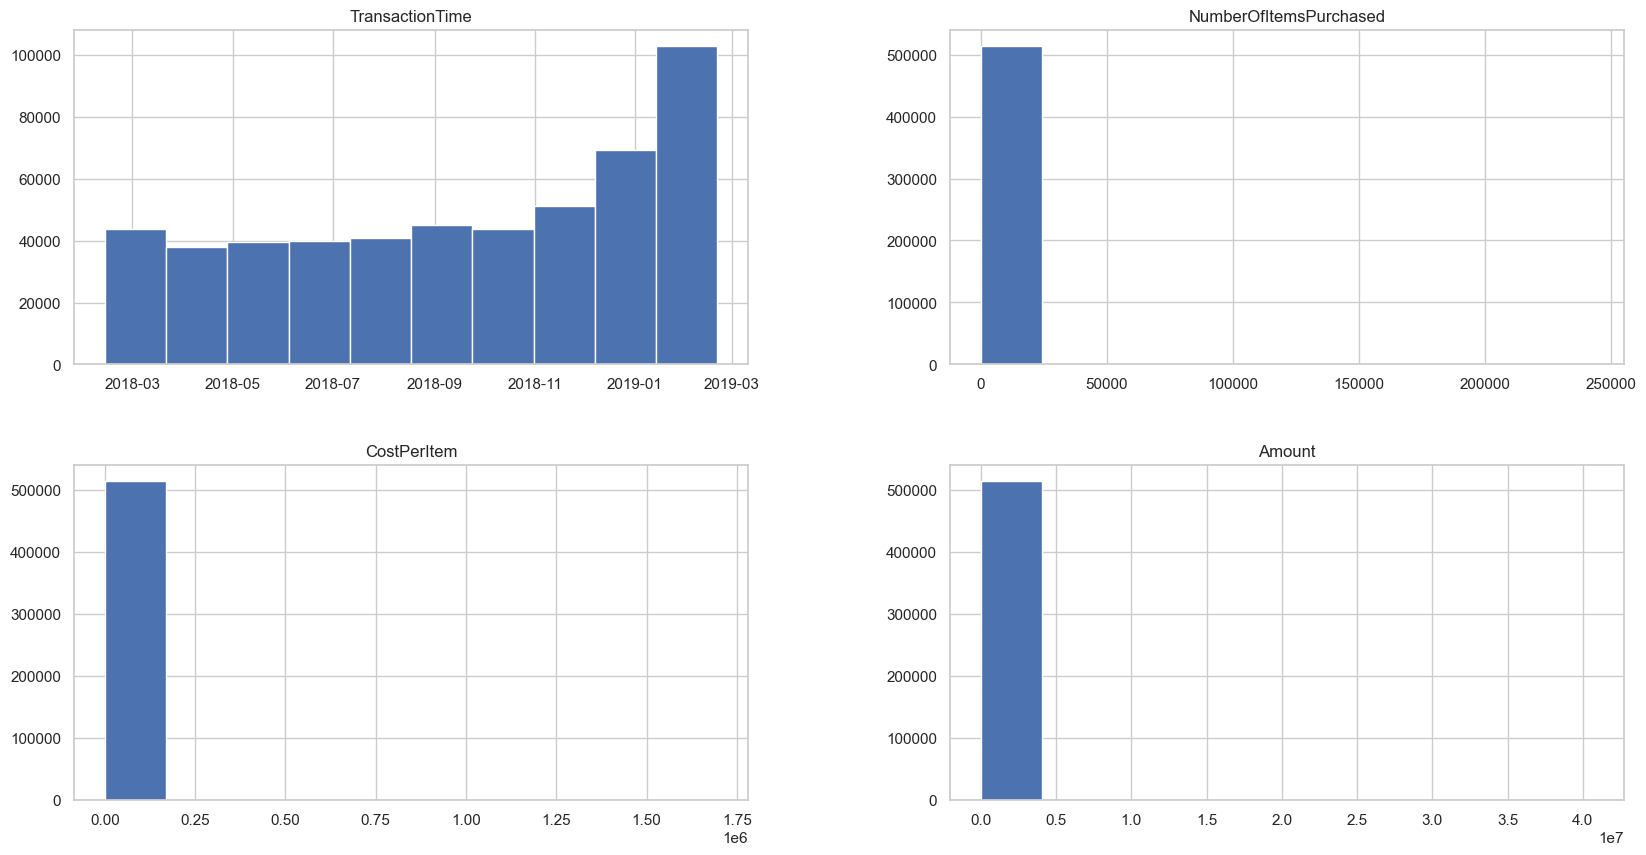

In [57]:
df_clean.hist(figsize=(20,10))

In [58]:
# Finding the upper and lower bounds on the 'CostPerItem' column
q3_cost = df_clean['CostPerItem'].quantile(0.75)
q1_cost = df_clean['CostPerItem'].quantile(0.25)
t_cost = q3_cost - q1_cost

outlier_above = q3_cost+1.5*t_cost
outlier_below = q1_cost-1.5*t_cost

print(f'CostPerItem upper bound : {outlier_above}')
print(f'CostPerItem lower bound : {outlier_below}')

# Finding the upper and lower bounds on the 'NumberOfItemsPurchased' column.
q3_items = df_clean['NumberOfItemsPurchased'].quantile(0.75)
q1_items = df_clean['NumberOfItemsPurchased'].quantile(0.25)
t_items = q3_items - q1_items

items_outlier_above = q3_items+1.5*t_items
items_outlier_below = q1_items-1.5*t_items

print(f'NumberOfItemsPurchased upper bound : {items_outlier_above}')
print(f'Batas bawah items lower bound : {items_outlier_below}')

CostPerItem upper bound : 11.655000000000001
CostPerItem lower bound : -4.225
NumberOfItemsPurchased upper bound : 85.5
Batas bawah items lower bound : -46.5


In [59]:
# Filtering rows where 'CostPerItem' and 'NumberOfItemsPurchased' is greater than the lower outlier bound and less than or equal to the upper outlier bound
df_clean = df_clean[(df_clean['CostPerItem'] > outlier_below)&(df_clean['CostPerItem'] <= outlier_above) & (df_clean['NumberOfItemsPurchased'] > items_outlier_below) &( df_clean['NumberOfItemsPurchased'] <= items_outlier_above)]

<Axes: xlabel='NumberOfItemsPurchased'>

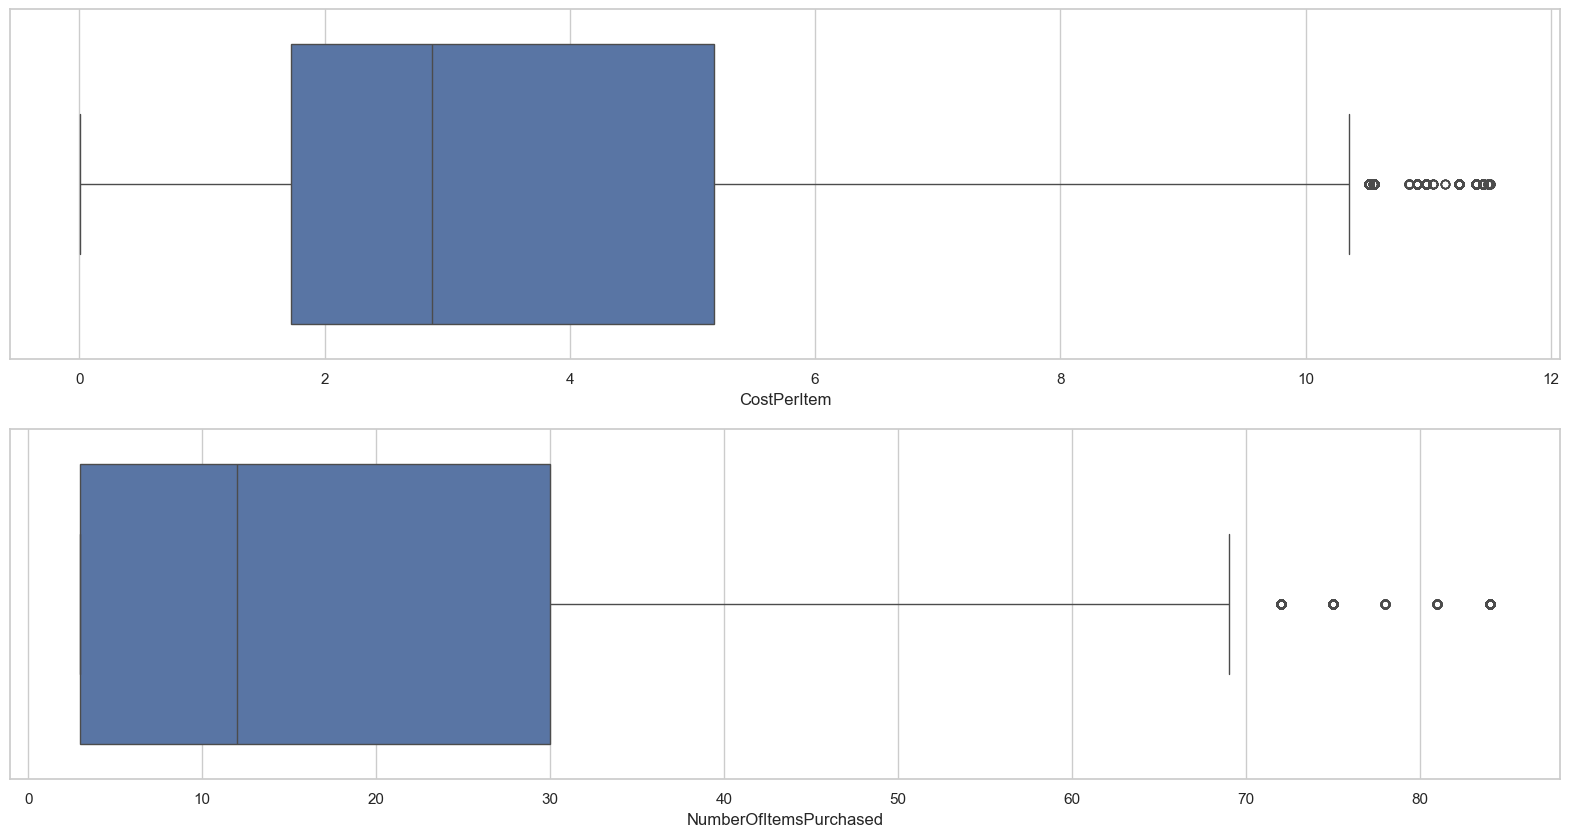

In [60]:
# Showing remaining outlier using boxplot
fig,axes = plt.subplots(2,1,figsize=(20,10))
sns.boxplot(ax=axes[0],x=df_clean['CostPerItem'])
sns.boxplot(ax=axes[1],x=df_clean['NumberOfItemsPurchased'])

array([[<Axes: title={'center': 'TransactionTime'}>,
        <Axes: title={'center': 'NumberOfItemsPurchased'}>],
       [<Axes: title={'center': 'CostPerItem'}>,
        <Axes: title={'center': 'Amount'}>]], dtype=object)

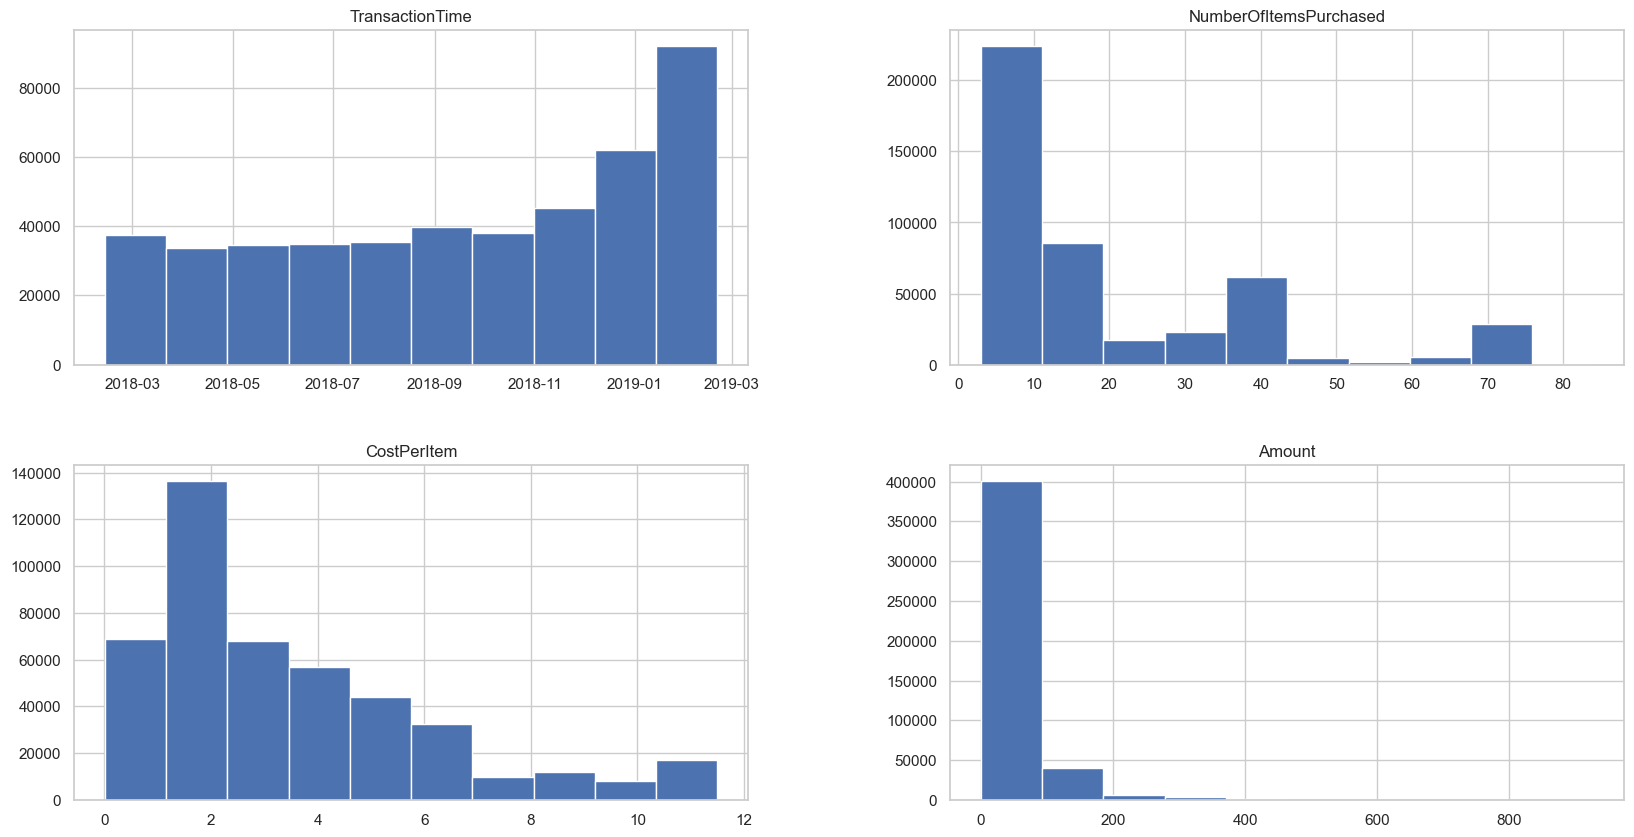

In [61]:
df_clean.hist(figsize=(20,10))

In [62]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452844 entries, 1 to 1081501
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   TransactionTime         452844 non-null  datetime64[ns]
 1   year_month              452844 non-null  period[M]     
 2   TransactionId           452844 non-null  object        
 3   UserId                  452844 non-null  object        
 4   Country                 452844 non-null  object        
 5   ItemCode                452844 non-null  object        
 6   ItemDescription         452844 non-null  object        
 7   NumberOfItemsPurchased  452844 non-null  int64         
 8   CostPerItem             452844 non-null  float64       
 9   Amount                  452844 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5), period[M](1)
memory usage: 38.0+ MB


In [63]:
df_clean.describe().T

,count,mean,min,25%,50%,75%,max,std
TransactionTime,452844,2018-09-17 13:31:23.687627520,2018-02-12 04:26:00,2018-06-11 08:05:00,2018-10-02 13:08:00,2018-12-31 12:59:00,2019-02-20 08:50:00,NaN
NumberOfItemsPurchased,452844.0,18.711331,3.0,3.0,12.0,30.0,84.0,19.306596
CostPerItem,452844.0,3.598301,0.01,1.73,2.88,5.18,11.5,2.666871
Amount,452844.0,49.05514,0.03,13.68,34.2,65.88,927.45,55.076246


# EDA

## Using Pivot Table to Shows Sales Created by Each Country by Each Month

In [64]:
pivot_country = pd.pivot_table(data=df_clean, columns='year_month', index='Country', values='Amount', aggfunc='sum')
pivot_country_total = pd.pivot_table(data=df_clean, columns='year_month', index='Country', values='Amount', aggfunc='sum', margins=True, margins_name='Total Sales')
pivot_country_total

year_month,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,Total Sales
Country,,,,,,,,,,,,,,
Australia,2789.52,5470.32,6261.33,3156.72,2113.65,7183.56,2986.74,9153.69,4617.72,2687.16,11133.15,335.16,1112.88,59001.60
Austria,370.20,NaN,1552.68,522.72,1109.52,2520.93,2618.76,1595.76,8172.18,NaN,3622.56,4396.47,2110.32,28592.10
Bahrain,NaN,NaN,NaN,NaN,NaN,1029.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1029.78
Belgium,1723.08,4708.98,2351.67,8755.92,11250.96,6379.95,13195.50,6770.22,11856.15,5684.40,17594.70,20874.78,6892.68,118038.99
Brazil,NaN,NaN,NaN,NaN,4014.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4014.06
Canada,NaN,NaN,NaN,583.44,NaN,NaN,NaN,7427.58,NaN,214.20,NaN,NaN,NaN,8225.22
Channel Islands,977.64,NaN,1481.22,11537.88,842.94,2120.79,5335.38,NaN,2108.04,8135.43,13368.51,5304.60,681.84,51894.27
Cyprus,5023.32,881.64,6151.29,4298.97,NaN,NaN,3664.92,NaN,NaN,NaN,10883.94,1702.14,NaN,32606.22
Czech Republic,NaN,NaN,NaN,1820.16,NaN,NaN,NaN,NaN,NaN,NaN,646.56,NaN,NaN,2466.72


## Showing total sales by each months

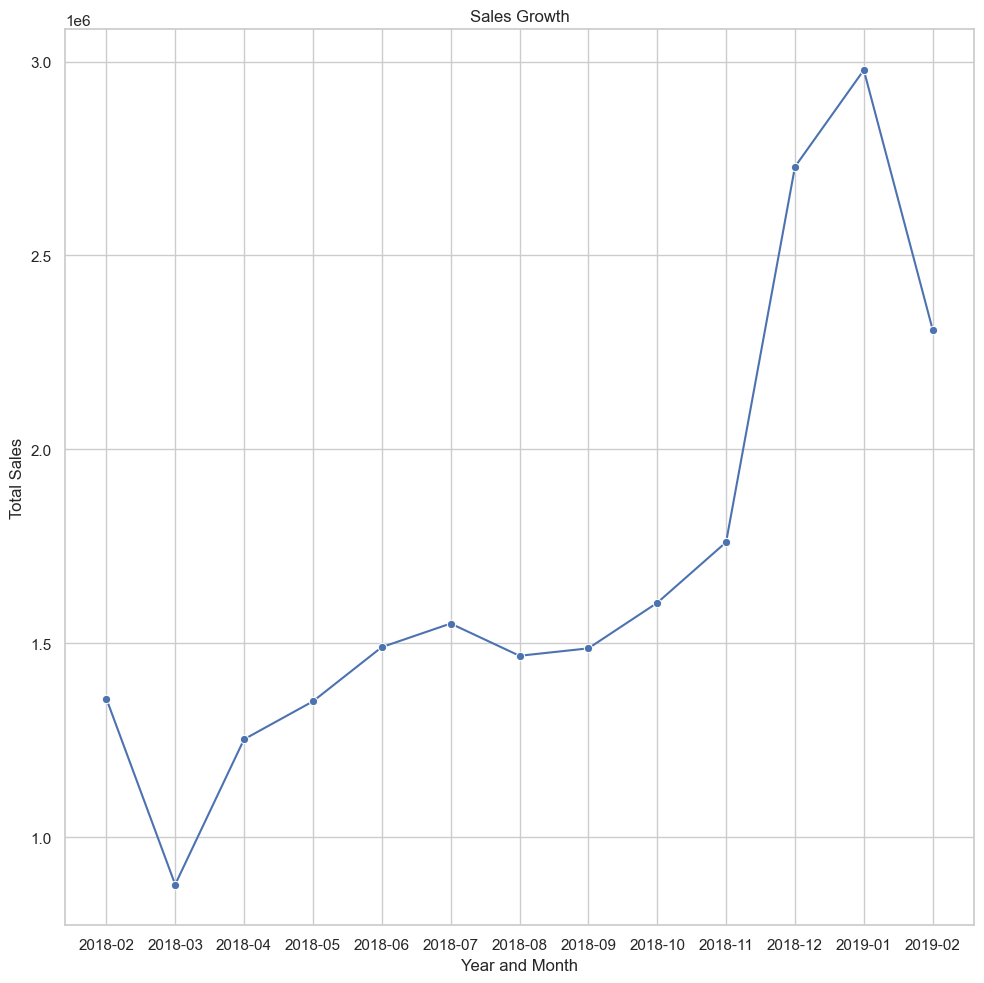

In [65]:
total_sales = df_clean.groupby('year_month')['Amount'].sum().reset_index()
total_sales['Amount'] = total_sales['Amount'].astype(int)
total_sales['year_month'] = total_sales['year_month'].astype(str)

sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
sns.lineplot(x=total_sales['year_month'],y=total_sales['Amount'], marker='o', linestyle='-', color='b')
plt.xlabel('Year and Month')
plt.ylabel('Total Sales',)
plt.title('Sales Growth')
plt.tight_layout()

### Performa Akumulasi Sales dan Jumlah User dari Setiap Negara

In [66]:
total_sales_country = df_clean.groupby('Country')['Amount'].sum().reset_index().sort_values('Amount',ascending=False)
total_sales_country['Percentage'] = (total_sales_country['Amount'] / total_sales_country['Amount'].sum())*100
total_sales_country['Total Users']=df_clean.groupby('Country')['UserId'].nunique().reset_index()['UserId']
total_sales_country

,Country,Amount,Percentage,Total Users
36,United Kingdom,19418607.45,87.414796,3784
14,Germany,599871.93,2.700383,93
13,France,529012.20,2.381401,88
10,EIRE,515186.91,2.319165,4
33,Switzerland,135969.87,0.612082,22
31,Spain,129598.95,0.583403,29
3,Belgium,118038.99,0.531364,25
27,Portugal,88467.93,0.398247,20
25,Norway,80253.36,0.361268,10
24,Netherlands,76790.52,0.345680,7


## Sales Performance of Each Country in February 2019


In [67]:
total_sales_country_2019 = df_clean.groupby(['Country','year_month'])['Amount'].sum().reset_index()
total_sales_country_2019['year_month'] = total_sales_country_2019['year_month'].astype(str)
total_sales_country_2019 = total_sales_country_2019[total_sales_country_2019['year_month'] == '2019-02']
total_sales_country_2019=total_sales_country_2019.sort_values('Amount',ascending = False)
total_sales_country_2019['Amount'] = total_sales_country_2019['Amount'].astype(int)
total_sales_country_2019['Percentage'] = ((total_sales_country_2019['Amount']/total_sales_country_2019['Amount'].sum())*100).round(3)
total_sales_country_2019[['Country','Amount','Percentage']]

,Country,Amount,Percentage
284,United Kingdom,2074661,89.872
110,France,54683,2.369
123,Germany,51413,2.227
84,EIRE,49459,2.143
196,Norway,15887,0.688
220,Portugal,11403,0.494
160,Italy,8249,0.357
186,Netherlands,7498,0.325
37,Belgium,6892,0.299
239,Spain,6880,0.298


### Sales Performance in Other Countries (other than the United Kingdom) in February 2019

In [68]:
total_sales_country_no_uk = df_clean.groupby(['Country','year_month'])['Amount'].sum().reset_index()
total_sales_country_no_uk = total_sales_country_no_uk[total_sales_country_no_uk['Country'] != 'United Kingdom']
total_sales_country_no_uk['year_month'] = total_sales_country_no_uk['year_month'].astype(str)
total_sales_country_no_uk = total_sales_country_no_uk[total_sales_country_no_uk['year_month'] == '2019-02']
total_sales_country_no_uk['Percentage'] = (total_sales_country_no_uk['Amount']/total_sales_country_no_uk['Amount'].sum())*100
total_sales_country_no_uk = total_sales_country_no_uk.sort_values('Amount',ascending=False)
total_sales_country_no_uk[['Country','Amount','Percentage']]

,Country,Amount,Percentage
110,France,54683.49,23.388725
123,Germany,51413.67,21.990188
84,EIRE,49459.83,21.154509
196,Norway,15887.82,6.795394
220,Portugal,11403.06,4.877213
160,Italy,8249.73,3.528500
186,Netherlands,7498.80,3.207319
37,Belgium,6892.68,2.948074
239,Spain,6880.26,2.942762
71,Denmark,3544.92,1.516201


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_9976\892108557.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=total_sales_country_no_uk['Country'],x=total_sales_country_no_uk['Amount'],orient='h',palette='magma')


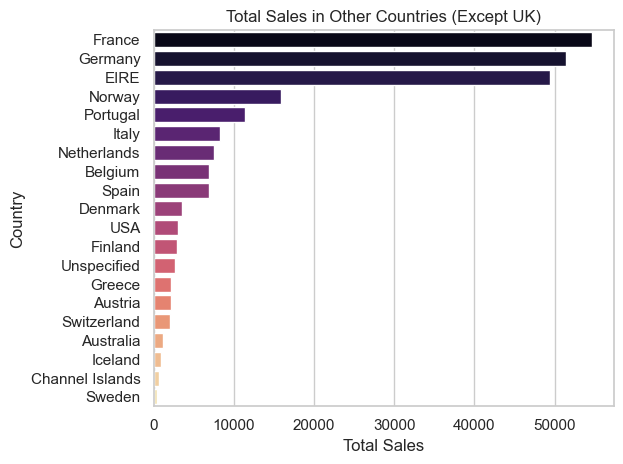

In [69]:
sns.barplot(y=total_sales_country_no_uk['Country'],x=total_sales_country_no_uk['Amount'],orient='h',palette='magma')
plt.title('Total Sales in Other Countries (Except UK)')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.tight_layout()

## Mengetahui Best Performing Product

In [70]:
product_sales = df_clean.groupby(['ItemDescription']).agg(
    Sold_Count = ('NumberOfItemsPurchased','sum')
).reset_index()
product_sales = product_sales.sort_values('Sold_Count',ascending=False)
product_sales

,ItemDescription,Sold_Count
2188,PACK OF 72 RETROSPOT CAKE CASES,48882
204,ASSORTED COLOUR BIRD ORNAMENT,42786
1704,JUMBO BAG RED RETROSPOT,41895
3621,WHITE HANGING HEART T-LIGHT HOLDER,34683
1873,LUNCH BAG RED RETROSPOT,32274
...,...,...
2872,SET 10 CARDS TRIANGLE ICONS 17220,3
1672,JARDIN ETCHED GLASS BUTTER DISH,3
404,BLUE CRYSTAL BOOT PHONE CHARM,3
1787,LARGE TAHITI BEACH BAG,3


# User Segmentation Analysis (United Kingdom)

In [71]:
# Choosing User from United Kingdom Only
df_user = df_clean[df_clean['Country'] == 'United Kingdom']
df_user

,TransactionTime,year_month,TransactionId,UserId,Country,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Amount
1,2018-12-26 09:06:00,2018-12,6283376,337701,United Kingdom,482370,LONDON BUS COFFEE MUG,3,3.52,10.56
3,2018-06-22 07:14:00,2018-06,6044973,380478,United Kingdom,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,5.19
4,2018-09-10 11:58:00,2018-09,6143225,0,United Kingdom,1733592,WASHROOM METAL SIGN,3,3.40,10.20
5,2019-01-11 09:50:00,2019-01,6307136,285957,United Kingdom,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,42.24
6,2018-09-28 10:51:00,2018-09,6162981,345954,United Kingdom,471576,NATURAL SLATE CHALKBOARD LARGE,9,6.84,61.56
...,...,...,...,...,...,...,...,...,...,...
1077625,2019-01-05 10:25:00,2019-01,6297599,357084,United Kingdom,487263,JUMBO BAG VINTAGE DOILY,6,2.88,17.28
1080730,2019-01-28 11:23:00,2019-01,6345240,0,United Kingdom,487116,VINTAGE LEAF MAGNETIC NOTEPAD,3,4.55,13.65
1081271,2018-12-23 10:34:00,2018-12,6277348,374577,United Kingdom,478506,CUSHION COVER PINK UNION JACK,9,8.22,73.98
1081376,2018-04-16 09:11:00,2018-04,5973099,378861,United Kingdom,469707,CHILDRENS APRON SPACEBOY DESIGN,12,2.70,32.40


In [72]:
# Aggregate Data
df_user = df_user.groupby(['Country','UserId']).agg(
    order_cnt = ('TransactionId','nunique'),
    recent_order = ('TransactionTime','max'),
    order_amount = ('Amount','sum')
).reset_index()
# Removing userid = 0
df_user = df_user[df_user['UserId']!= '0']
df_user['order_amount'] = df_user['order_amount'].astype(int)
df_user

,Country,UserId,order_cnt,recent_order,order_amount
1,United Kingdom,267687,11,2019-02-18 10:34:00,11214
2,United Kingdom,267708,197,2019-02-20 08:20:00,86171
3,United Kingdom,267729,5,2019-02-17 05:56:00,11992
4,United Kingdom,269220,4,2019-02-17 11:12:00,3832
5,United Kingdom,269241,1,2018-07-21 11:51:00,314
...,...,...,...,...,...
3779,United Kingdom,383880,1,2018-05-19 05:52:00,666
3780,United Kingdom,383901,1,2018-08-24 06:53:00,194
3781,United Kingdom,383922,2,2019-02-13 07:43:00,468
3782,United Kingdom,383943,16,2019-02-17 08:02:00,8032


In [73]:
# Create a "today" variable based on the last order from all users
today = df_user['recent_order'].max()
today

Timestamp('2019-02-20 08:49:00')

In [74]:
df_user['days_since_last_order'] = today - df_user['recent_order']
df_user['days_since_last_order'] = df_user['days_since_last_order'].dt.days

In [75]:
# Frequency Binning
freq_bins = [0,
             np.percentile(df_user['order_cnt'],20),
             np.percentile(df_user['order_cnt'],40),
             np.percentile(df_user['order_cnt'],60),
             np.percentile(df_user['order_cnt'],80),
             np.max(df_user['order_cnt'])
             ]



# Recency Binning
rec_bins = [0,
            np.percentile(df_user['days_since_last_order'],20),
            np.percentile(df_user['days_since_last_order'],40),
            np.percentile(df_user['days_since_last_order'],60),
            np.percentile(df_user['days_since_last_order'],80),
            np.max(df_user['days_since_last_order'])
            ]

# Monetary binning
mon_bins = [0,
            np.percentile(df_user['order_amount'],20),
            np.percentile(df_user['order_amount'],40),
            np.percentile(df_user['order_amount'],60),
            np.percentile(df_user['order_amount'],80),
            np.max(df_user['order_amount'])
            ]

df_user['frequency_score'] = pd.cut(x=df_user['order_cnt'],bins=freq_bins,labels=[1,2,3,4,5],include_lowest = True)
df_user['recency_score'] = pd.cut(df_user['days_since_last_order'],bins=rec_bins,labels=[5,4,3,2,1],include_lowest = True)
df_user['monetary_score'] = pd.cut(df_user['order_amount'],bins=mon_bins,labels=[1,2,3,4,5],include_lowest = True)

df_user.sample(20)

,Country,UserId,order_cnt,recent_order,order_amount,days_since_last_order,frequency_score,recency_score,monetary_score
2533,United Kingdom,345891,1,2018-05-22 05:41:00,929,274,1,1,2
3110,United Kingdom,363531,2,2018-12-04 10:11:00,3292,77,2,2,4
3629,United Kingdom,379281,10,2019-01-30 07:20:00,6679,21,5,4,5
3069,United Kingdom,362103,26,2019-02-19 09:26:00,27416,0,5,5,5
1772,United Kingdom,323253,2,2019-02-04 12:48:00,961,15,2,4,2
803,United Kingdom,293979,12,2019-02-10 09:40:00,14686,9,5,5,5
2284,United Kingdom,338520,3,2018-12-23 10:22:00,2192,58,3,3,3
2630,United Kingdom,348936,2,2019-02-05 12:31:00,1744,14,2,4,3
3264,United Kingdom,368088,8,2019-02-19 09:27:00,11587,0,5,5,5
534,United Kingdom,285474,1,2018-12-30 06:19:00,1647,52,1,3,3


In [76]:
df_user['segmentation'] = np.select([
    (df_user['frequency_score'] >= 4) & (df_user['recency_score'] == 5),
    (df_user['frequency_score'] >= 4) & (df_user['recency_score'].between(4,3)),
    (df_user['frequency_score'] == 5) & (df_user['recency_score'].between(2,1)),
    (df_user['frequency_score'].between(2,3)) & (df_user['recency_score'].between(5,4)),
    (df_user['frequency_score'] == 3) & (df_user['recency_score'] == 3),
    (df_user['frequency_score'].between(3,4)) & (df_user['recency_score'].between(2,1)),
    (df_user['frequency_score'] == 1) & (df_user['recency_score'] == 5),
    (df_user['frequency_score'] == 1) & (df_user['recency_score'] == 4),
    (df_user['frequency_score'].between(1,2)) & (df_user['recency_score'] == 3),
    (df_user['frequency_score'].between(1,2)) & (df_user['recency_score'].between(2,1))
],['01.Champions','02.Loyal Customers','03.Can\'t Loose Them','04. Potential Loyalist','05. Need Attention','06. At Risk',
   '07.New Customers','08.Promising','09.About to Sleep','10. Hibernating']
)
df_user

,Country,UserId,order_cnt,recent_order,order_amount,days_since_last_order,frequency_score,recency_score,monetary_score,segmentation
1,United Kingdom,267687,11,2019-02-18 10:34:00,11214,1,5,5,5,01.Champions
2,United Kingdom,267708,197,2019-02-20 08:20:00,86171,0,5,5,5,01.Champions
3,United Kingdom,267729,5,2019-02-17 05:56:00,11992,3,4,5,5,01.Champions
4,United Kingdom,269220,4,2019-02-17 11:12:00,3832,2,4,5,4,01.Champions
5,United Kingdom,269241,1,2018-07-21 11:51:00,314,213,1,1,1,10. Hibernating
...,...,...,...,...,...,...,...,...,...,...
3779,United Kingdom,383880,1,2018-05-19 05:52:00,666,277,1,1,1,10. Hibernating
3780,United Kingdom,383901,1,2018-08-24 06:53:00,194,180,1,1,1,10. Hibernating
3781,United Kingdom,383922,2,2019-02-13 07:43:00,468,7,2,5,1,04. Potential Loyalist
3782,United Kingdom,383943,16,2019-02-17 08:02:00,8032,3,5,5,5,01.Champions


In [77]:
user_segmentation =df_user.groupby(['Country','segmentation']).agg(
    user_count = ('UserId','nunique'),
    average_last_purchease = ('days_since_last_order','mean'),
    average_purchase_frequency = ('order_cnt','mean'),
).reset_index()
user_segmentation['persentase'] = ((user_segmentation['user_count']/user_segmentation['user_count'].sum())*100).round(2)
user_segmentation

,Country,segmentation,user_count,average_last_purchease,average_purchase_frequency,persentase
0,United Kingdom,01.Champions,521,4.934741,11.694818,13.77
1,United Kingdom,02.Loyal Customers,573,31.481675,6.904014,15.15
2,United Kingdom,03.Can't Loose Them,55,131.709091,8.145455,1.45
3,United Kingdom,04. Potential Loyalist,449,15.757238,2.423163,11.87
4,United Kingdom,05. Need Attention,104,48.971154,3.000000,2.75
5,United Kingdom,06. At Risk,274,132.102190,3.562044,7.24
6,United Kingdom,07.New Customers,59,6.338983,1.000000,1.56
7,United Kingdom,08.Promising,158,22.867089,1.000000,4.18
8,United Kingdom,09.About to Sleep,411,50.992701,1.369830,10.86
9,United Kingdom,10. Hibernating,1179,204.023749,1.279898,31.17


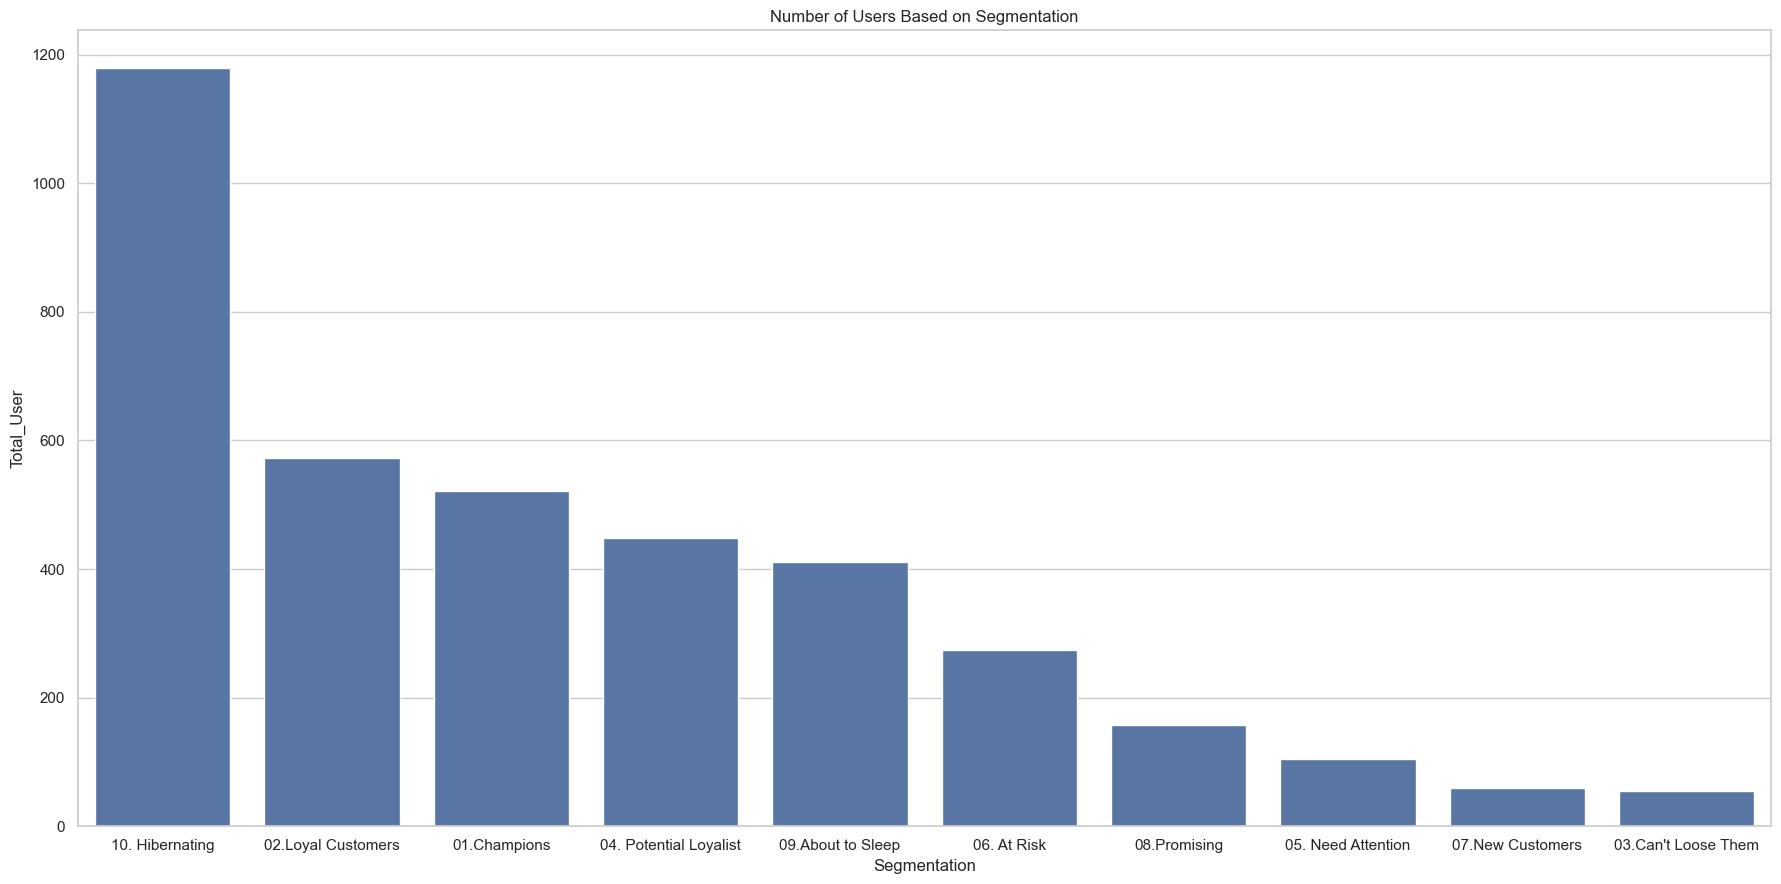

In [78]:
user_segmentation= user_segmentation.sort_values('persentase',ascending=False)

fig, ax = plt.subplots(figsize=(18,9))
sns.barplot(x=user_segmentation['segmentation'],y=user_segmentation['user_count'],orient='v')
plt.title('Number of Users Based on Segmentation')
plt.xlabel('Segmentation')
plt.ylabel('Total_User')
plt.tight_layout()